Part a. Using pure Numpy to build a 3 layer neural network (with relu nonlinearity - this is different from the  2 layer i have provided in the colab in slide deck) to train on data - pick appropriate number of neurons in each layer and just use relu for non linearity.

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

# Defining Classes

### Linear Layer

In [2]:
class Linear:
  def __init__(self, input_dim, num_hidden_layer=1):
    #xavier initialization
    self.weights = np.random.randn(input_dim, num_hidden_layer) * np.sqrt( 2. / (input_dim))
    self.bias = np.zeros((1))

  def __call__(self, input):
    self.input = input
    output = input @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.input.T @ gradient
    self.bias_gradient = gradient.sum()
    self.input_gradient = gradient @ self.weights.T
    return self.input_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

## Loss Class

In [3]:
class MSSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred)** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

## RELU

In [4]:
class Relu:
  def __call__(self, input_):
    self.input_ = input_
    self.output = np.clip(self.input_, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input_ > 0 ) * output_gradient
    return self.input_gradient

## Model Class

In [5]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden, 50)
    self.relu2 = Relu()
    self.linear3 = Linear(50, 2)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradeint = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradeint)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

## Plot Model

In [7]:
pip install tsne

     |████████████████████████████████| 552kB 5.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260485 sha256=eb3d2a575389a589b86caa47132fce0b3b443a1c13dcf1dd7ce3789cbbe922ed
  Stored in directory: /root/.cache/pip/wheels/3e/d6/fc/58392f18ea8fc4c74e20185d2faeee87a1c1924a182606c6cd
Successfully built tsne


In [14]:
#Plot using TSNE
from sklearn.manifold import TSNE
from tsne import bh_sne
def tsne_plot(x, y_data):
  vis_data = bh_sne(x)
  # plot the result
  vis_x = vis_data[:, 0]
  vis_y = vis_data[:, 1]
  plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap("jet", 10),label="underlying function")
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  plt.show()

# Call Model

In [16]:
num_epochs = 200
lr = 0.01
d = 3
n = 100

#y = x^3*w + x^2*w + x*w + b
inputs = np.random.uniform(-1, 1, (n,d))
weights_true = np.array([ [2,-1,1] , [1,-1,1] ]).T
bias_true = np.array([10])
y_true = (inputs**3) @ weights_true + (inputs**2) @ weights_true + inputs @ weights_true + bias_true
#user defined loss function
loss = MSSE()
#model object with dimenstions and number of hidden layers
model = Model(d, 20)
def fit(x: np.ndarray, y:np.ndarray, model: Callable, loss: Callable, lr: float, num_epoch: int):
  for epoch in range(num_epoch):
    #pred
    y_pred = model(x)
    #calculate Loss
    loss_value = loss(y_pred, y)
    #Epoch value to analyse the progress
    print("Epoch - ", epoch, " Loss Value - ", loss_value)
    #Gradient for backward
    gradient_from_loss = loss.backward()
    #Updating model backward
    model.backward(gradient_from_loss)
    #updating model
    model.update(lr)

fit(inputs, y_true, model, loss, lr, num_epochs)

Epoch -  0  Loss Value -  108.85416608925802
Epoch -  1  Loss Value -  52.60908447813606
Epoch -  2  Loss Value -  61.08495054814907
Epoch -  3  Loss Value -  106.18200418334665
Epoch -  4  Loss Value -  98.17424720566986
Epoch -  5  Loss Value -  90.79497254255719
Epoch -  6  Loss Value -  83.994815814777
Epoch -  7  Loss Value -  77.72842568365827
Epoch -  8  Loss Value -  71.95439084597488
Epoch -  9  Loss Value -  66.63335761390854
Epoch -  10  Loss Value -  61.72965524442266
Epoch -  11  Loss Value -  57.21054153340334
Epoch -  12  Loss Value -  53.045844079586224
Epoch -  13  Loss Value -  49.20775841556871
Epoch -  14  Loss Value -  45.67066202792934
Epoch -  15  Loss Value -  42.41094300985991
Epoch -  16  Loss Value -  39.40684219028816
Epoch -  17  Loss Value -  36.63830767574056
Epoch -  18  Loss Value -  34.0868608259053
Epoch -  19  Loss Value -  31.73547276166758
Epoch -  20  Loss Value -  29.568450575897472
Epoch -  21  Loss Value -  27.571332483010277
Epoch -  22  Loss 

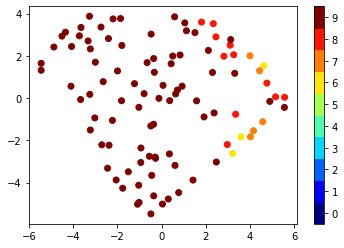

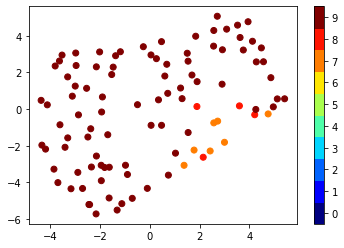

In [15]:
tsne_plot(inputs, y_true[:,0])
tsne_plot(inputs, y_true[:,1])